In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvaingle/crop-recommendation-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\moham\.cache\kagglehub\datasets\atharvaingle\crop-recommendation-dataset\versions\1


📥 Étape 1 : Chargement du dataset



In [3]:
import pandas as pd

# 📄 Chargement du dataset
df = pd.read_csv("Crop_recommendation.csv")

# 👀 Aperçu des 5 premières lignes
print("Aperçu des données :")
df.head()

Aperçu des données :


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# 📚 Informations générales
print("\nInfos sur les colonnes :")
df.info()



Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# 📊 Statistiques descriptives
print("\nStatistiques :")
df.describe()


Statistiques :


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


🧼 Étape 2 : Nettoyage des données

In [6]:
# 🔍 Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [7]:
# 🔍 Vérification des doublons
print("\nNombre de doublons :", df.duplicated().sum())


Nombre de doublons : 0


🔍 Étape 3 : Analyse Exploratoire (EDA)


Maintenant, on va explorer un peu les données pour :

Comprendre la distribution des features

Voir la répartition des cultures (label)

Identifier d’éventuelles corrélations

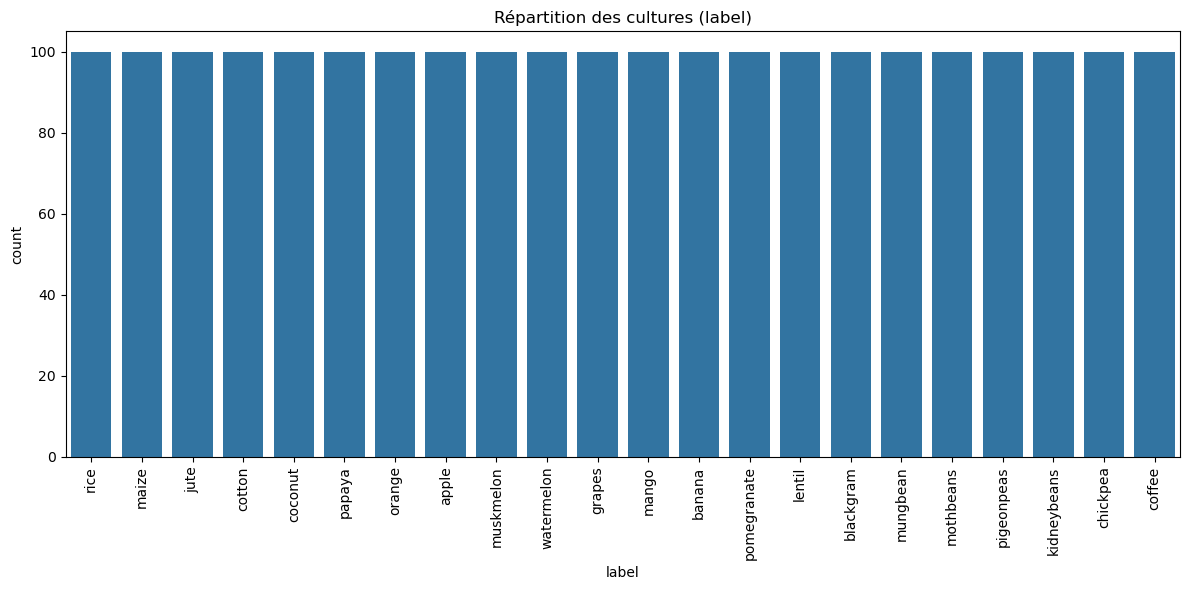

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#📌 1. Visualiser la répartition des cultures (cible)

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Répartition des cultures (label)")
plt.tight_layout()
plt.show()


📊 Interprétation du graphique :
Toutes les cultures sont parfaitement équilibrées.

Chaque classe (type de culture comme rice, maize, cotton, mango, etc.) a exactement le même nombre d’échantillons (100).

👉 Cela signifie que notre problème de classification n’est pas affecté par un déséquilibre de classes, ce qui est très bon pour entraîner un modèle fiable.

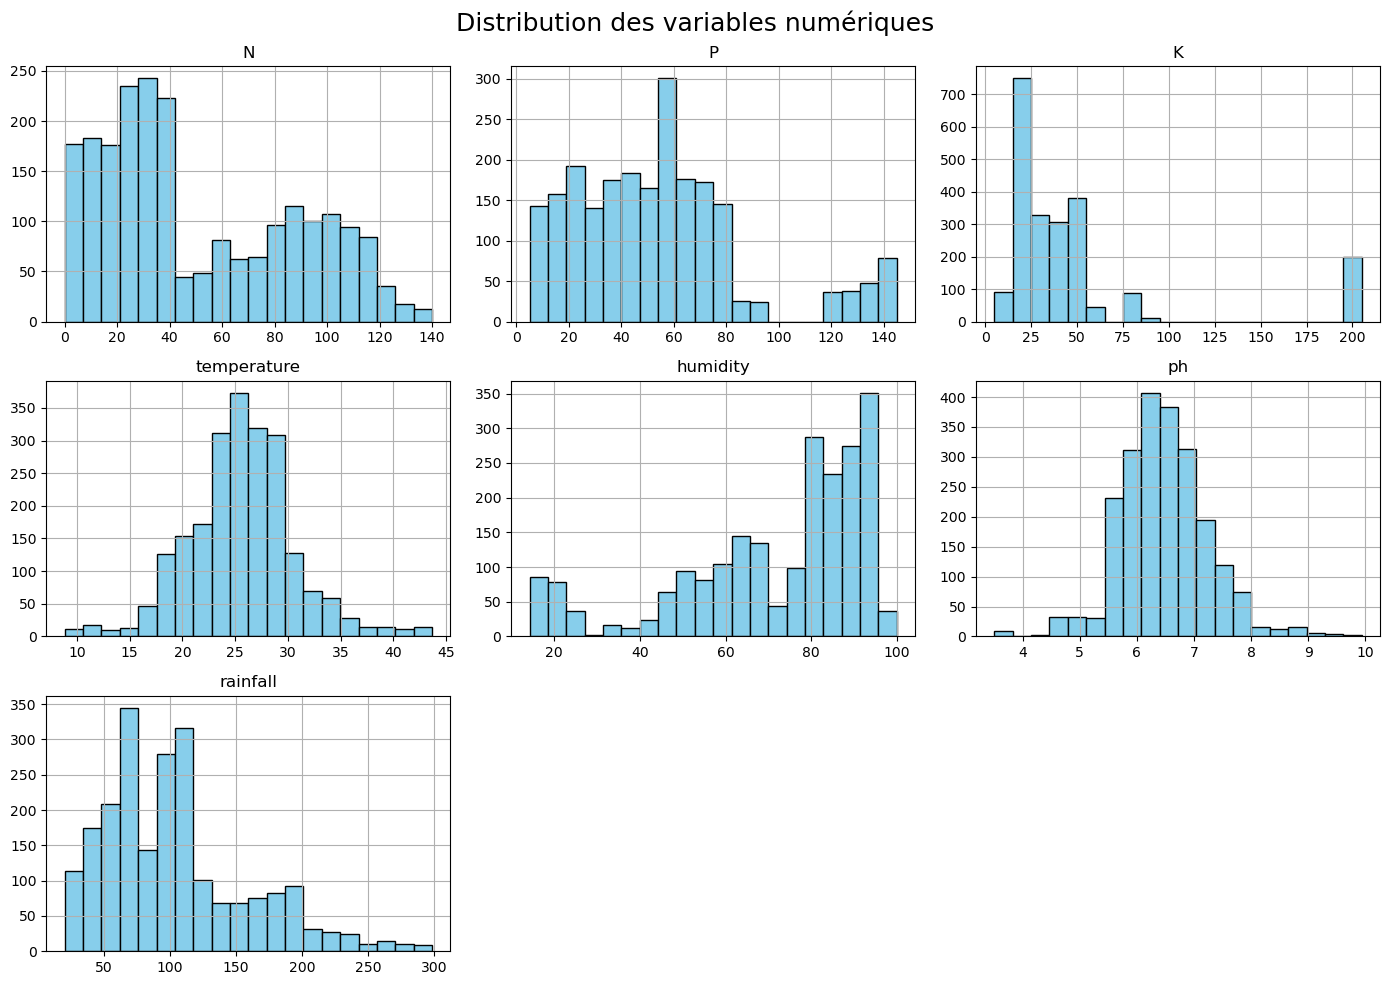

In [9]:
#📌 2. Distribution des variables numériques

df.hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=18)
plt.tight_layout()
plt.show()

🔍 Analyse des distributions :

N (Azote) :
Distribution bimodale.
Une majorité des valeurs entre 0 et 60, mais aussi une autre masse autour de 80-120.
Il pourrait être utile de standardiser cette variable pour certains modèles.

P (Phosphore) :
Distribution relativement uniforme mais avec un pic clair autour de 60.
Quelques valeurs hautes peu fréquentes, peut-être des outliers.

K (Potassium) :
Distribution très asymétrique à droite (skewed).
Beaucoup de valeurs basses, quelques très grandes valeurs autour de 200 → fort déséquilibre.
Peut nécessiter une transformation logarithmique.

Température :
Assez bien répartie, forme proche d’une courbe normale (distribution gaussienne).
C’est bon signe pour les modèles linéaires.

Humidité :
Distribution irrégulière avec plusieurs pics.
Forte concentration entre 80 et 100 → attention aux déséquilibres.

pH :
Distribution assez normale centrée autour de 6.5.
Bonne nouvelle, pas besoin de transformation ici.

Pluviométrie (rainfall) :
Distribution asymétrique (skewed), quelques valeurs très hautes (> 200).
Peut fausser certains modèles → une normalisation ou transformation peut être utile.

C:\Users\moham\AppData\Local\Temp\ipykernel_17520\403450101.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


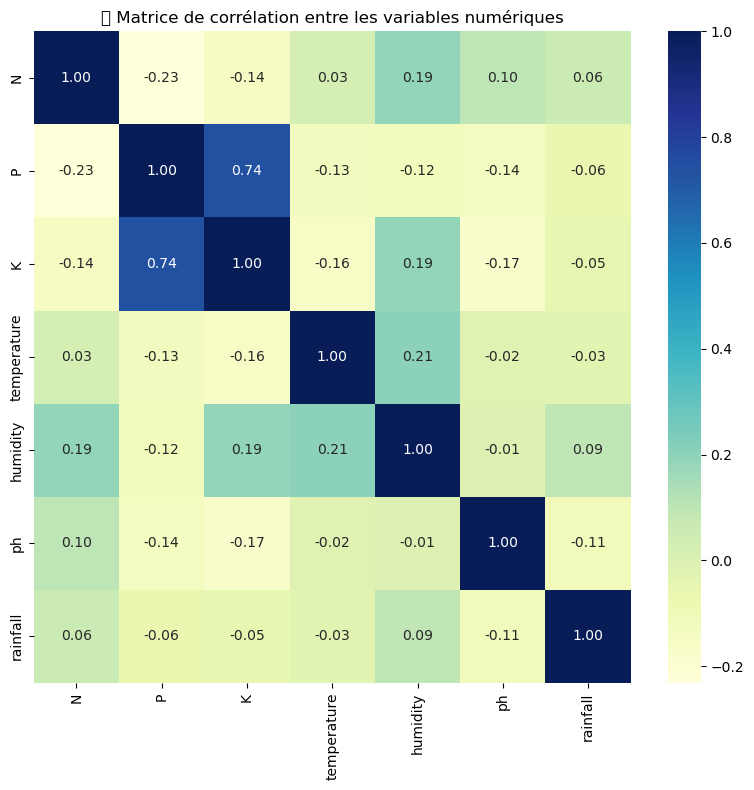

In [10]:
#📌 3. Corrélation entre les variables

import seaborn as sns
import matplotlib.pyplot as plt

# 🧹 On sélectionne uniquement les colonnes numériques (on exclut 'label' car c'est une chaîne de caractères)
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# 📊 Affichage de la matrice de corrélation
plt.figure(figsize=(8, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("🔍 Matrice de corrélation entre les variables numériques")
plt.tight_layout()
plt.show()



🔍 Interprétation des résultats

Variables fortement corrélées --> P et K :Corrélation = 0.74	              

Interprétation : 📈 Corrélation positive forte → Quand le phosphore augmente, le potassium aussi augmente généralement.

Les autres corrélations	entre -0.23 et 0.23	.
Interprétation : 📈Très faibles, donc peu ou pas de relation linéaire notable entre les autres variables.

✅ P et K étant fortement corrélées, cela pourrait créer de la redondance dans certains modèles (comme la régression linéaire). Il est parfois utile :
de combiner ces variables ;
ou de n’en garder qu’une seule dans un modèle simple.

❗Mais attention : certains modèles comme les arbres de décision, random forest ou XGBoost gèrent bien la redondance → pas besoin de supprimer les colonnes.

Cette étape est exploratoire, elle ne nécessite pas de modification immédiate, mais nous éclaire pour plus tard.



⚙️ Étape 4 : Préparation des données ()

D’après les histogrammes, K et rainfall sont très asymétriques.
On peut appliquer une transformation logarithmique pour les rendre plus "normales".

On utilise la standardisation car nos variables ont des unités différentes (ex : °C, %, kg/ha…).
C’est important surtout pour les modèles sensibles à l’échelle (comme KNN, SVM, Régression…).




In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Copie du DataFrame original pour éviter d'altérer les données de base
df_copy = df.copy()

# 2. Appliquer une transformation log1p (log(1+x)) pour les variables très asymétriques
# Cela aide à réduire l'effet des valeurs extrêmes (grande asymétrie à droite)
df_copy['K'] = np.log1p(df_copy['K'])
df_copy['rainfall'] = np.log1p(df_copy['rainfall'])

# 3. Sélection des variables numériques à standardiser
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# 4. Initialisation du standardiseur
scaler = StandardScaler()

# 5. Application de la standardisation (centrer-réduire : moyenne = 0, écart-type = 1)
df_copy[numerical_features] = scaler.fit_transform(df_copy[numerical_features])
df_copy[numerical_features].head() # Aperçu du résultat

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,0.285354,-0.935587,0.472666,0.043302,1.483789
1,0.933329,0.140616,0.221018,-0.759646,0.397051,0.734873,1.685576
2,0.255986,0.049647,0.316433,-0.515898,0.486954,1.771510,1.963897
3,0.635298,-0.556811,0.187692,0.172807,0.389805,0.660308,1.811709
4,0.743673,-0.344551,0.253560,-1.083647,0.454792,1.497868,1.955246


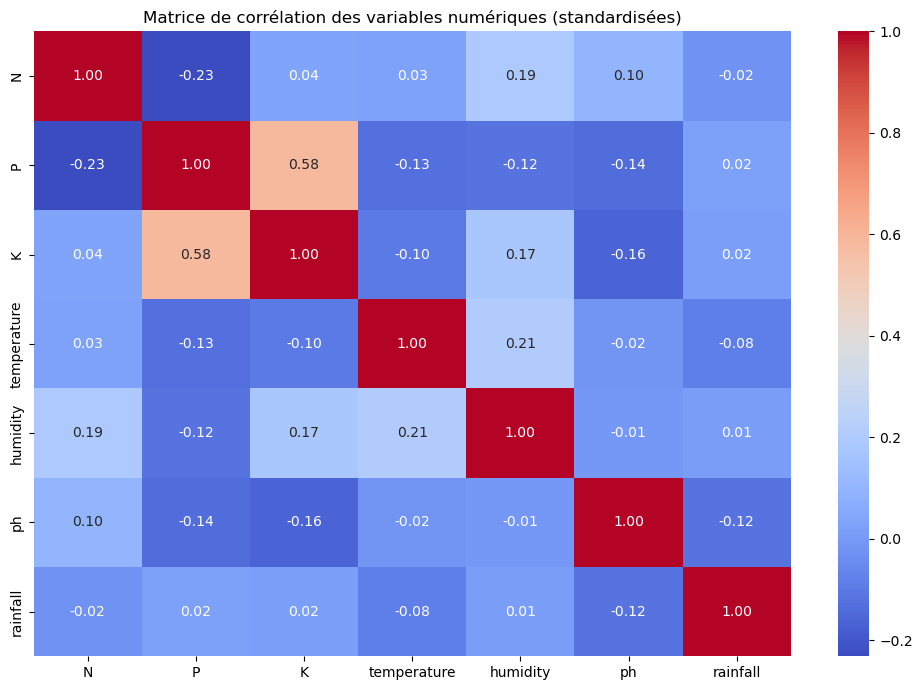

In [12]:
# 6. Affichage de la matrice de corrélation (correlation heatmap)
plt.figure(figsize=(10, 7))
sns.heatmap(df_copy[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables numériques (standardisées)")
plt.tight_layout()
plt.show()

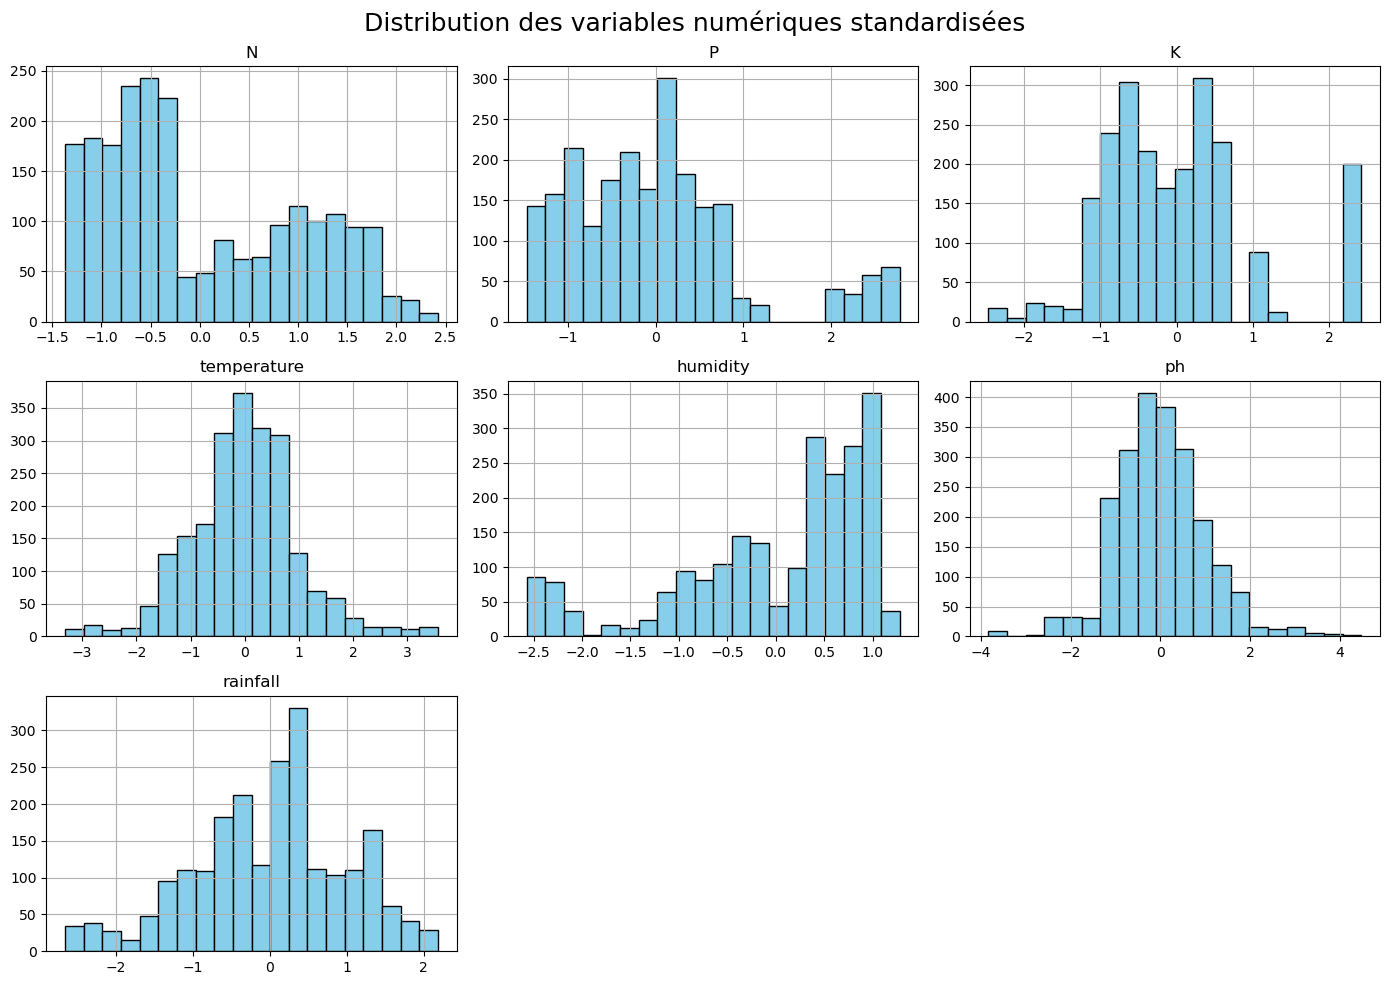

In [13]:
# 7. Visualisation de la distribution des variables standardisées
df_copy[numerical_features].hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution des variables numériques standardisées", fontsize=18)
plt.tight_layout()
plt.show()


In [ ]:
#8 : encodage la variable cible (label) en valeurs numériques
from sklearn.preprocessing import LabelEncoder

# Création de l'encodeur
label_encoder = LabelEncoder()

# Encodage de la colonne 'label'
df_copy['label'] = label_encoder.fit_transform(df_copy['label'])

# On peut vérifier les correspondances
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [15]:
#9 : Séparation X (features) / y (target)
x=df_copy[numerical_features]
y=df_copy['label']
x.head(),y.head() # Aperçu des données

(          N         P         K  temperature  humidity        ph  rainfall
 0  1.068797 -0.344551  0.285354    -0.935587  0.472666  0.043302  1.483789
 1  0.933329  0.140616  0.221018    -0.759646  0.397051  0.734873  1.685576
 2  0.255986  0.049647  0.316433    -0.515898  0.486954  1.771510  1.963897
 3  0.635298 -0.556811  0.187692     0.172807  0.389805  0.660308  1.811709
 4  0.743673 -0.344551  0.253560    -1.083647  0.454792  1.497868  1.955246,
 0    20
 1    20
 2    20
 3    20
 4    20
 Name: label, dtype: int32)

📌 Étape 5 : Modélisation (Random Forest)


✅ 1. Séparer les données en ensemble d'entraînement et ensemble de test

In [16]:
from sklearn.model_selection import train_test_split

# 📊 Séparer les données (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Taille des ensembles :")
print("Entraînement :", x_train.shape)
print("Test :", x_test.shape)


Taille des ensembles :
Entraînement : (1760, 7)
Test : (440, 7)


📌 random_state = clé pour reproduire exactement les mêmes résultats à chaque fois.
C’est indispensable pour faire des expériences fiables et comparables en data science & machine learning.

✅ 2. Entraîner un Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

# 🌳 Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

✅ 3. Prédire sur le jeu de test

In [18]:
# 🎯 Prédiction
y_pred = model.predict(x_test)


✅ 4. Évaluer le modèle

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📈 Évaluation
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy : {acc:.2f}")
print("\n📋 Rapport de classification :\n", classification_report(y_test, y_pred))


✅ Accuracy : 1.00

📋 Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.

C:\Users\moham\AppData\Local\Temp\ipykernel_17520\2730146616.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df,palette='viridis',legend=False)


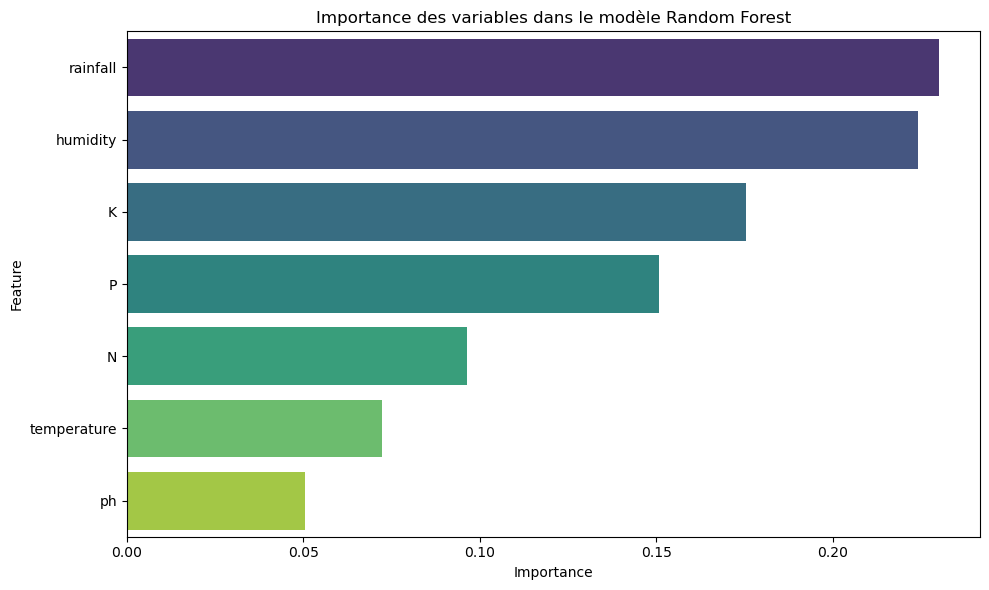

In [20]:
# 🎯 Importance des variables
importances = model.feature_importances_
features = x.columns

# Affichage trié des importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 📊 Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df,palette='viridis',legend=False)
plt.title("Importance des variables dans le modèle Random Forest")
plt.tight_layout()
plt.show()


🌐 7. Déploiement

In [24]:
import joblib

# Sauvegarde du modèle
joblib.dump(model, "crop_recommendation_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(scaler, 'scaler.pkl') # Enregistrer le scaler entraîné

['scaler.pkl']